In [1]:
import pandas as pd

In [2]:
seller = pd.read_excel('../../Downloads/BestSellerList.xlsx')

In [3]:
seller.head(2)

,월,순위,도서명,저자,출판사,출판 일자,정가,적립포인트,대분야,ISBN
0,2021년,1,달러구트 꿈 백화점(레인보우 에디션),이미예,팩토리나인,20200708,13800,690,판타지소설,9791165341909
1,2021년,2,주린이가 가장 알고 싶은 최다질문 TOP 77(교보 단독 리커버),염승환,메이트북스,20210726,18000,900,주식투자,9791160023459


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
mms = MinMaxScaler()

In [7]:
import numpy as np

In [15]:
price = seller['정가'].values.reshape(-1,1) # 1차원데이터가 2차원데이터로 바뀐다 . // 2차원으로 reshape 리쉐이프 한다 

In [16]:
mms.fit(price)

MinMaxScaler()

In [18]:
price_transform = mms.transform(price)

In [23]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

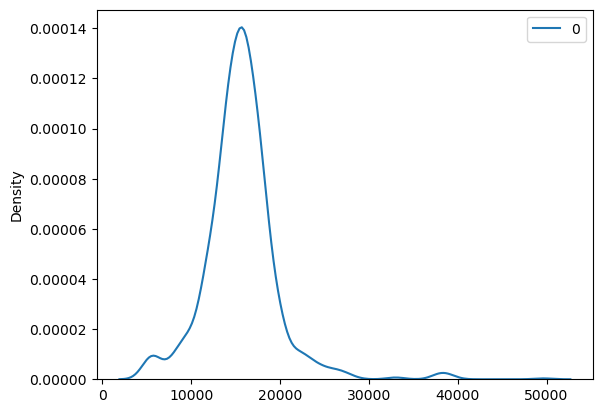

In [25]:
sns.kdeplot(price)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

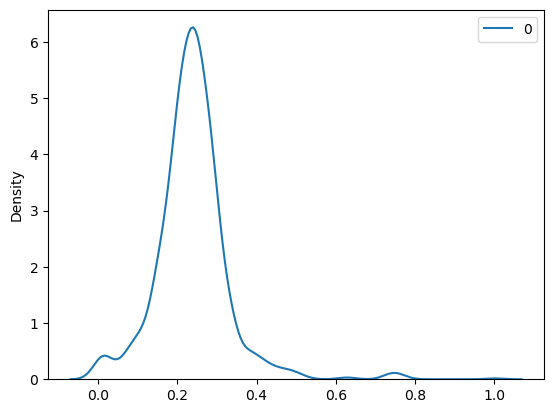

In [27]:
sns.kdeplot(price_transform)

In [28]:
# R에서는 QQPlot Python에서는 probPlot
import matplotlib.pyplot as plt

In [29]:
from scipy import stats

((array([-3.22496729, -2.96183903, -2.81513631, ...,  2.81513631,
          2.96183903,  3.22496729]),
  array([ 5000,  5000,  5000, ..., 39000, 39000, 49600], dtype=int64)),
 (3868.1949079539563, 15638.90909090909, 0.9281281109016449))

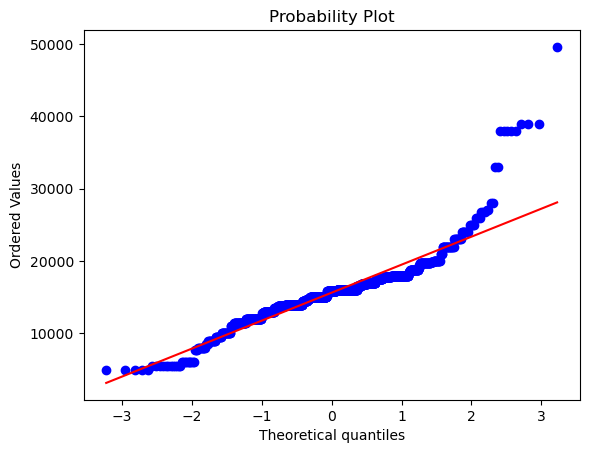

In [32]:
# dist 기준이 될 선 plot=plt 그래프를 그릴 엔진을 무엇으로 할꺼야 matplotlib
stats.probplot(seller['정가'], dist=stats.norm, plot=plt)       

# 실습 z-score를 이용해서 데이터표준화 하기

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()               # Scaler라고 부르지만 정규화

In [35]:
ss.fit(price)

StandardScaler()

In [39]:
price_ss = ss.transform(price)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-3.0, 3.0)

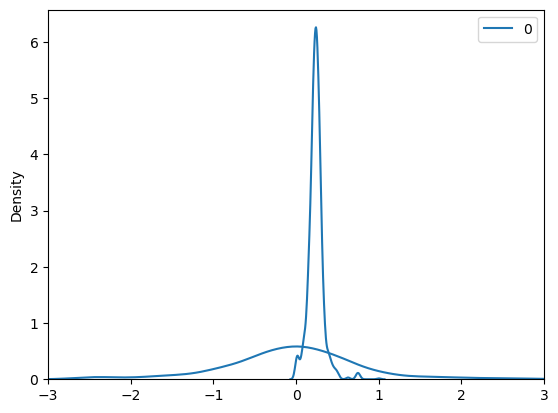

In [42]:
sns.kdeplot(price_ss)
sns.kdeplot(price_transform)
plt.xlim(-3,3)                              # 표준화와 정규화의 차이??

In [43]:
price

array([[13800],
       [18000],
       [15800],
       ...,
       [16800],
       [18000],
       [15000]], dtype=int64)

In [44]:
price_ss

array([[-0.44235538],
       [ 0.56796787],
       [ 0.03875093],
       ...,
       [ 0.27930408],
       [ 0.56796787],
       [-0.1536916 ]])

In [46]:
ss.inverse_transform(price_ss) == price # price를 원상복귀 하는 함수

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
iris = sns.load_dataset('iris')

In [16]:
#iris

In [17]:
l_setosa = iris[iris['species'] == 'setosa']
l_verscol = iris[iris['species'] == 'versicolor']

In [18]:
#iris[iris['species'] == 'setosa']

In [19]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [81]:
# sns.boxplot(data=iris, x=l_setosa, y='sepal_length')
# plt.show()

# T-test 관련 함수

In [20]:
def ttest(x, y):
    stt = stats.ttest_ind(x, y)
    print(f'Students ttest: {stt[1]}')
    
    wtt = stats.ttest_ind(x, y, equal_var=False)
    print(f'Welchs ttest: {wtt[1]}')
    
    mtt = stats.ttest_ind(x, y)
    print(f'Mann whitney U test: {mtt[1]


}')
    

In [24]:
m = iris['species'] != 'virginica' # 아이리스 데이터를 묶기 [] 넣으면 error

In [25]:
iris2 = iris[m]   # 마스킹

In [26]:
iris_setosa = iris2.query('species == "setosa"')['sepal_length']
iris_versicolor = iris2.query('species == "versicolor"')['sepal_length']

In [27]:
ttest(iris_setosa, iris_versicolor) #,wtt,mtt)

Students ttest: 8.985235037487079e-18
Welchs ttest: 3.746742613983842e-17
Mann whitney U test: 8.985235037487079e-18


In [28]:
stats.ttest_ind(iris_setosa, iris_versicolor)

TtestResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18, df=98.0)

In [29]:
a, b = stats.ttest_ind(iris_setosa, iris_versicolor)

In [30]:
if b < 0.001:
    sig = '***'
elif b < 0.01:
    sig = '**'
elif b < 0.05:
    sig = '**'
else:
    sig = 'ns'

In [31]:
sig

'***'

In [32]:
b

8.985235037487079e-18

TypeError: not enough arguments for format string

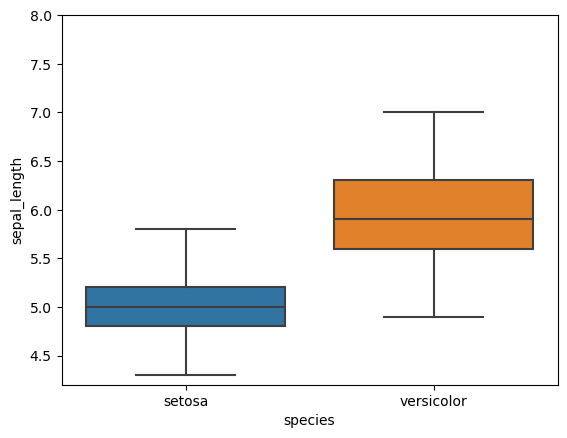

In [33]:
sns.boxplot(data=iris2, x='species', y='sepal_length')
plt.ylim(iris2['sepal_length'].min()-0.1,iris2['sepal_length'].max()+1)  # = plt.ylim(4,9)
#plt.text(0.45, iris2['sepal_length'].max()+0.6, sig)                     # *** * 별 그리기
plt.text(0.15, iris2['sepal_length'].max()+0.6, 'r=%0.3f\np=%0.3f'%b) # stats.ttest_ind(iris_setosa, iris_versicolor) # pvalue값 나오게 변경
#plt.text(crab['Age'].min()+0.5, crab['Length'].max()+0.2, 'r=%0.3f\np=%0.3f'%(r,p))
#plt.text(0.45, iris2['sepal_length'].max()+0.6, 'pvalue = '+b)
plt.plot([0,0,1,1],
         [iris2['sepal_length'].max()+0.2, iris2['sepal_length'].max()+0.4,        # iris2 왼쪽에서 오른쪽 setosa 0 versicolor 1
          iris2['sepal_length'].max()+0.4, iris2['sepal_length'].max()+0.2],
        color='k')

plt.ylabel('length (cm)')
plt.title('sepal length by iris species')
plt.show()

# 위에 코드를 자동으로 함수나 패키지로 묶어서 해보기

In [128]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: t-test independent samples with Bonferroni correction, P_val=8.985e-18 stat=-1.052e+01


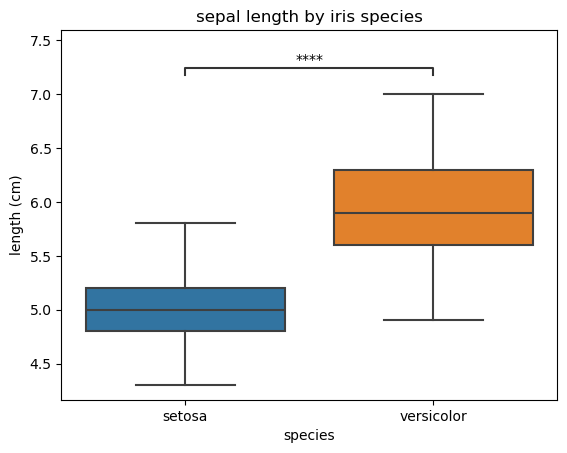

In [134]:
box = sns.boxplot(data=iris2, x='species', y='sepal_length')  # 그래피플롯를 변수에 넣을수있다.
plt.ylabel('length (cm)')
plt.title('sepal length by iris species')

add_stat_annotation(box, data=iris2, x='species', y='sepal_length',
                   box_pairs=[('setosa','versicolor')],
                    # list안에 tuple을 적는다
                   test='t-test_ind')

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: t-test independent samples with Bonferroni correction, P_val=2.696e-17 stat=-1.052e+01
versicolor v.s. virginica: t-test independent samples with Bonferroni correction, P_val=5.175e-07 stat=-5.629e+00
setosa v.s. virginica: t-test independent samples with Bonferroni correction, P_val=2.068e-27 stat=-1.539e+01


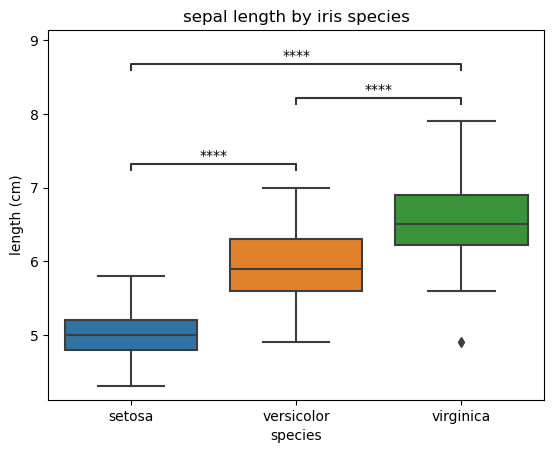

In [137]:
box = sns.boxplot(data=iris, x='species', y='sepal_length')  # 그래피플롯를 변수에 넣을수있다.
plt.ylabel('length (cm)')
plt.title('sepal length by iris species')

add_stat_annotation(box, data=iris, x='species', y='sepal_length',
                    # 페어추가할려면 [( 튜플 ) ]튜플 추가하면된다. cutoff /1 을했기 때문에 t-test 변화는 없다.
                   box_pairs=[('setosa','versicolor'),('versicolor','virginica'),('setosa','virginica')],                    
                    # list안에 tuple을 적는다.
                   test='t-test_ind')

plt.show()

In [151]:
import plotly.express as px
#import matplotlib.pyplot as plt

In [140]:
cat = seller.value_counts('대분야')

In [144]:
cat2 = cat[cat > cat.mean()]                 # 평균보다 숫자가 높은것들을  cat2 변수로.

In [158]:
fig = px.pie(values=cat2, names=cat2.index, title='책 분야별 점유율')               # values 라디안길이
# 기본 저장 px.pie > png  ...를 jqg로 바꿀수
fig.write_html('fig.html')
#plt.barplot(data=cat2, names=cat2.index, title='책 분야별 점유율')

In [154]:
cat2.index

Index(['한국소설일반', '한국에세이', '자기관리/처세', '인문교양', '부자되는법', '일본소설일반', '판타지소설',
       '경제전망', '부동산투자', '한국작가', '마인드콘트롤/감정', '미스터리/스릴러소설', '카네기시리즈',
       '투자가이드/자산관리', 'SF/판타지', '주식투자', '교양심리', '고전소설/문학선', '현대시', '영미소설일반',
       '단어/어휘', 'TV/애니메이션/영화', '외국작가', '성공스토리', '만화일반', '과학/컴퓨터', '정치가',
       '대화/화술', '한국사/인물/문화/지리', '공포/호러소설', '과학이야기'],
      dtype='object', name='대분야')

In [163]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries'

In [180]:
# python/visualization/파이썬 동적 시각화 패키지 플로틀리로 원그래프 그리기.ipynb

In [4]:
# 패키지 불러오기
#from dash import Dash, dcc, html, Input, Output
from dash import *           # *를 자주쓰진 않치만 dash 는 전체가 많이 없어서 쓴다
import plotly.express as px

In [5]:
app = Dash(__name__)  # 파이썬 예약자 : 지금 작업하는 공간이 어느 공간인지 
# app create 


In [6]:
app

In [11]:
graph

NameError: name 'graph' is not defined

In [7]:
app.layout = html.Div([             # 웹프레임워크 관련  div 영역분리
    html.H4('anaiysis'),            # 제목 설정
    dcc.Graph(id='graph'),
    html.P("Names:"),   # p 문단표현
    dcc.Dropdown(id='names',
                options=['smoker','day','time','sex'],
                value='day', clearable=False           # clearable 글씨지울수없음
    ),
    html.P("Values:"),
    dcc.Dropdown(id='values',      # 드롭다운 메뉴 설정
                options=['total_bill','tip','size'],
                value='total_bill', clearable=False
    ),
])

In [8]:
@app.callback(
    Output("graph",'figure'),      # ( html이름 ,들어갈데이터속성)
    Input("names",'value'),
    Input("values",'value'))
    
def generate_chart(names, values):
    df = px.data.tips() # 실데이터값
    fig = px.pie(df, values=values, names=names, ho
                 
                 
                 
                 le=.3) # 원그래프 그리기
    #fig = px.bar(df, y=values, x=names) #, hue=day) # 바그래프 그리기
    # px.box 박스그래프 그리기
    return fig

In [9]:
px.data.tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
px

<module 'plotly.express' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\plotly\\express\\__init__.py'>

In [10]:
# 어떤 컬럼이랑 컬럼을 파이차트로 그릴것 인가
app.run_server(debug=False)

In [ ]:
# 참고 python/visualization/파이썬으로 3차원 산점도 (3D Scatter Plot) 그려보기.ipynb
# matplotlib 으로 하는방법

In [7]:
# plotly.express 로 그리기
import seaborn as sns
import plotly.express as px

In [8]:
iris = sns.load_dataset('iris')

In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
px.scatter_3d(data_frame=iris, x = 'sepal_length', y = 'sepal_width', z= 'petal_length', color='species')

NameError: name 'px' is not defined

In [14]:
import ydata_profiling

In [15]:
pf = iris.profile_report()

In [16]:
pf         # 데이터 프로파일링을 해준다
# html

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
# 파이썬에서 선형회귀(Linear regression)를 이용한 게 나이 예측하기
# scikit-learn/선형회귀(Linear regression)를 이용한 게 나이 예측하기.ipynb
# scikit-learn/Data/CrabAgePrediction.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
crab = pd.read_csv('https://raw.githubusercontent.com/boringariel/scikit-learn/master/Data/CrabAgePrediction.csv') #, sep=',') #CrabAgePrediction.csv
#crab = pd.read_csv('../../Downloads/CrabAgePrediction.csv')

<Axes: xlabel='Age', ylabel='Length'>

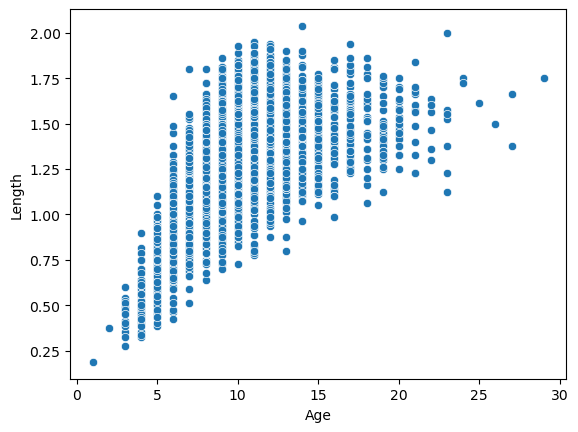

In [5]:
sns.scatterplot(data=crab, x='Age', y='Length')

In [11]:
from scipy import stats

In [12]:
r, p = stats.pearsonr(crab['Age'],crab['Length']) # statistic 추세선의 기울기 pvalue 거의 0 통계적으로 무의미하다.

In [14]:
r

0.5549732839723359

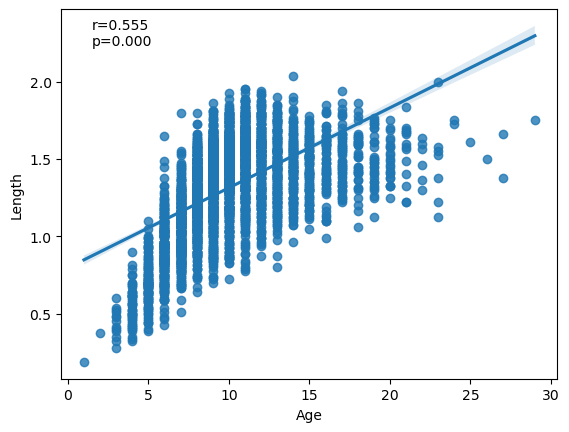

In [15]:
sns.regplot(data=crab, x='Age', y='Length')
plt.text(crab['Age'].min()+0.5, crab['Length'].max()+0.2, 'r=%0.3f\np=%0.3f'%(r,p)) # 쿼릴레스아그식스 correlation analysis visualization
plt.show()